In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv("crime_data.csv")

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.shape


(50, 5)

In [5]:
df=df.rename({'Unnamed: 0':'States'},axis=1)


In [6]:
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
df.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

## Hierarchical CLustering

In [12]:
columns_to_scale = [col for col in df.columns if col != "States"]


In [49]:
scaler = MinMaxScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [17]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


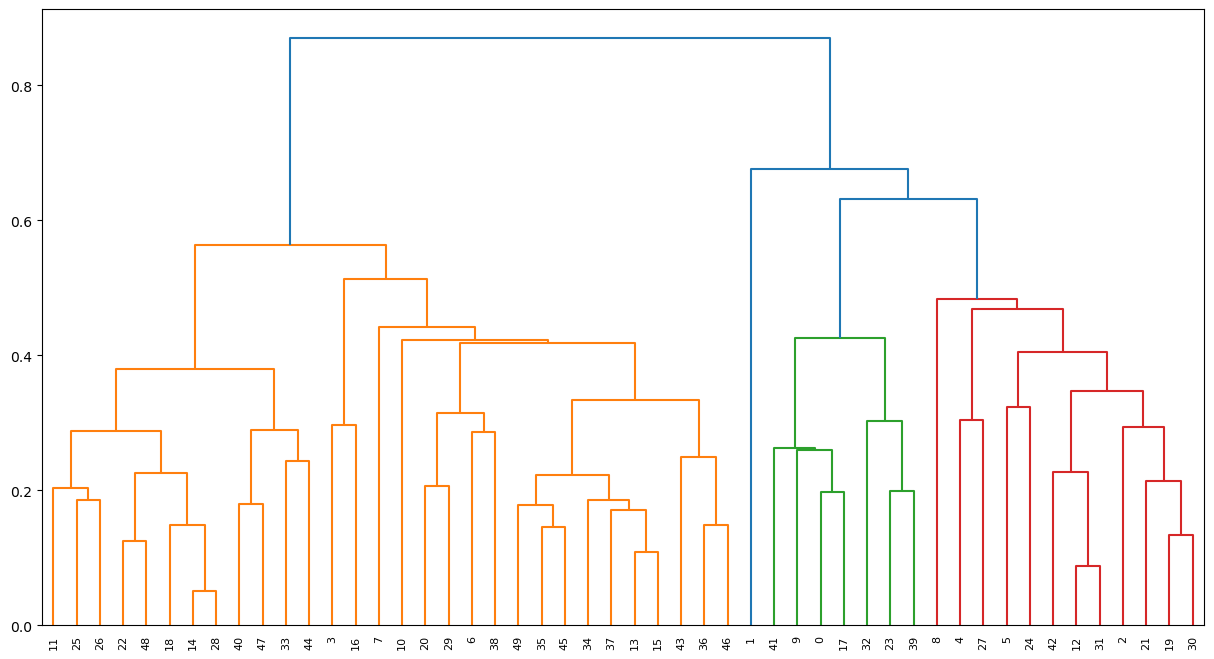

In [20]:
import scipy.cluster.hierarchy as sch
fig = plt.figure(figsize=(15,8))

dend = sch.dendrogram(sch.linkage(df, method='average'))

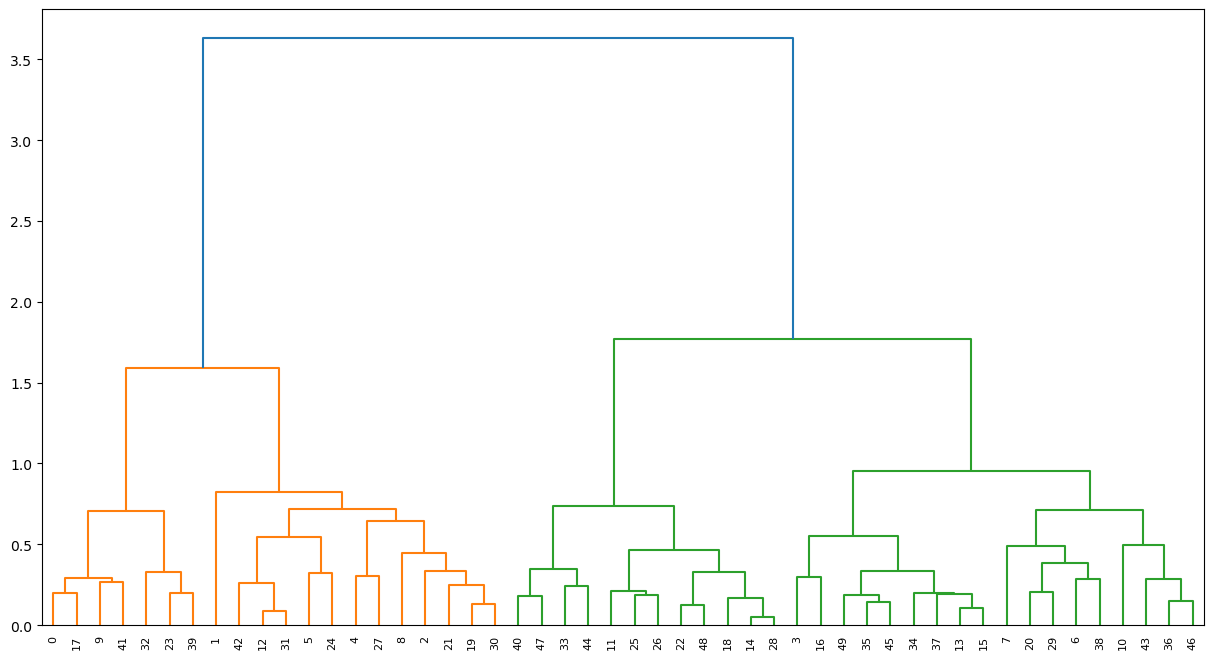

In [22]:
fig = plt.figure(figsize=(15,8))

dend = sch.dendrogram(sch.linkage(df, method='ward'))

In [24]:
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')

In [25]:
hac

AgglomerativeClustering(n_clusters=4)

In [26]:
label_h = hac.fit_predict(df)

In [27]:
label_h

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [35]:
df1 = df

In [36]:
df1['Label'] = label_h

In [37]:
df.sort_values("Label").reset_index()


,index,Murder,Assault,UrbanPop,Rape,Label
0,49,0.361446,0.397260,0.474576,0.214470,0
1,29,0.397590,0.390411,0.966102,0.297158,0
2,16,0.536145,0.219178,0.338983,0.232558,0
3,15,0.313253,0.239726,0.576271,0.276486,0
4,34,0.391566,0.256849,0.728814,0.364341,0
5,13,0.385542,0.232877,0.559322,0.354005,0
6,35,0.349398,0.363014,0.610169,0.328165,0
7,36,0.246988,0.390411,0.593220,0.568475,0
8,20,0.216867,0.356164,0.898305,0.232558,0
9,10,0.271084,0.003425,0.864407,0.333333,0


## KMeans

In [80]:
dff=pd.read_csv('crime_data.csv')
from sklearn.cluster import KMeans

aa = []
for i in range(1,8):
    km = KMeans(n_clusters=i)
    km.fit(df)
    aa.append(km.inertia_)

In [81]:
aa

[64.96412255025645,
 24.267771049154796,
 11.342964478682088,
 3.7627981012942966,
 3.230658554255652,
 2.868545044575667,
 2.6611709653632847]

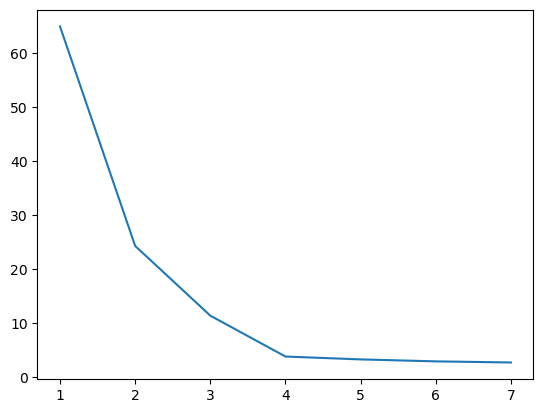

In [82]:
plt.plot(range(1,8),aa)

In [83]:
km = KMeans(n_clusters=4)
label_2 = km.fit_predict(df)

In [84]:
df2 = df

In [85]:
df2['Label'] = label_2

In [86]:
dff['Label'] = label_2

In [88]:
dff.head(4)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Label
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2


In [89]:
dff['Label'].value_counts()


2    18
1    13
3    12
0     7
Name: Label, dtype: int64

In [93]:
dff.groupby('Label').mean()


,Murder,Assault,UrbanPop,Rape
Label,,,,
0,14.671429,251.285714,54.285714,21.685714
1,10.815385,257.384615,76.000000,33.192308
2,6.055556,140.055556,71.333333,18.683333
3,3.091667,76.000000,52.083333,11.833333


#### Cluster 0:
This cluster has the highest average values for Murder and Assault among all clusters, indicating that it may represent areas with higher crime rates. The high values for Rape and relatively low UrbanPop suggest that these areas might have a lower population density.

#### Cluster 1:
This cluster has relatively high values for Murder and Assault, similar to Cluster 0, but it has the highest average value for UrbanPop, suggesting that it might represent urban areas with higher crime rates. The high value for Rape indicates a significant number of reported cases in these areas.

#### Cluster 2:
This cluster has the lowest average values for Murder, Assault, UrbanPop, and Rape among all clusters. It appears to represent areas with relatively lower crime rates and lower population density.

#### Cluster 3:
This cluster has moderate average values for Murder and Assault, suggesting moderate crime rates. However, it has a lower average value for Rape compared to Clusters 0 and 1. This cluster may represent areas with a relatively balanced crime profile.

## DBSCAN

In [99]:
from sklearn.cluster import DBSCAN

dfdb = pd.read_csv('crime_data.csv')


In [102]:
dfdb = dfdb.drop('Unnamed: 0',axis=1)

In [103]:
array = dfdb.values

In [105]:
stscaler = StandardScaler().fit(array)
X2 = stscaler.transform(array)

In [106]:
X2

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [126]:
db = DBSCAN(eps = 0.9, min_samples = 3)

In [127]:
label_db = db.fit_predict(X2)

In [128]:
label_db

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3, -1,  3,  1, -1, -1,  1,  1, -1,  1, -1,  3,  2, -1,  1,
        1,  1,  4,  1, -1, -1,  1,  0,  2,  4, -1,  1,  4,  1,  1,  1])

In [129]:
dfdb['Label'] = label_db

In [130]:
dfdb

,Murder,Assault,UrbanPop,Rape,Label
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


In [131]:
dfdb['Label'].value_counts()


 1    20
-1    17
 0     4
 2     3
 3     3
 4     3
Name: Label, dtype: int64